# Data for Clustering

In [1]:
import pandas as pd
import sys
import numpy as np

sys.path.append("./my-staff")

import matplotlib.pyplot as plt
from ChernoffFace import chernoff_face, variables_rescale
import matplotlib.cm
from globals import PATH_DS, TARGET

from sklearn.preprocessing import LabelEncoder
import seaborn as sns



In [2]:
df = pd.read_csv(PATH_DS + "cleaned_cirrhosis_all.csv")

In [3]:
df.shape

(312, 19)

In [4]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [5]:
X = df.drop(TARGET, axis=1)  # Variables predictoras

# Preprecesing
- COnvert string into numerical
- FOr clustering ists important to standaried but loss interpretability so we are not going to use that and use mannholis distance

In [6]:
string_cols = list(X.select_dtypes(include=['object']).columns)
string_cols

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [7]:
binary_categorical_variables = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'O']
binary_categorical_variables

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

In [8]:
label_encoder = LabelEncoder()

# Transformar variables categóricas binarias
for col in binary_categorical_variables:
    X[col] = label_encoder.fit_transform(X[col])
    print(label_encoder.classes_)

['D-penicillamine' 'Placebo']
['F' 'M']
['N' 'Y']
['N' 'Y']
['N' 'Y']


In [9]:
X.dtypes

N_Days             int64
Drug               int64
Age              float64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [10]:

X = pd.get_dummies(X, columns=["Edema"])
X.columns


Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Edema_N',
       'Edema_S', 'Edema_Y'],
      dtype='object')

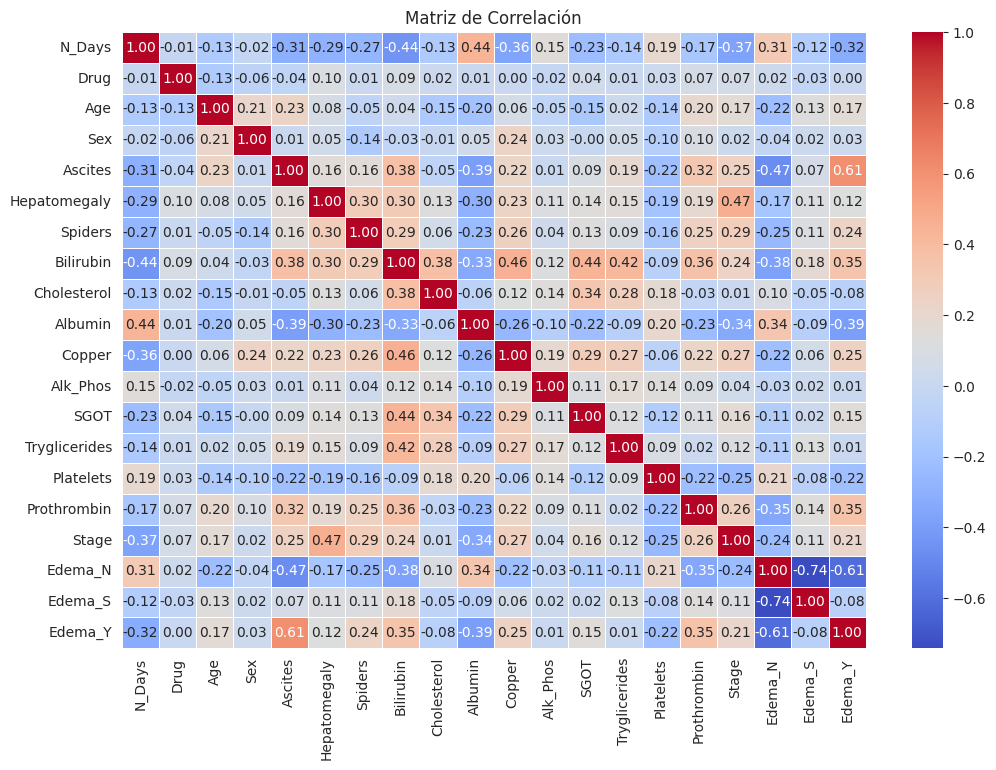

In [11]:
correlation_matrix = X.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [24]:
# Generate data
np.random.seed(32)
data = variables_rescale(X)[:9]


In [13]:
data.head()

,Edema_N,Edema_S,Edema_Y,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,True,0.079513,0.0,0.622822,0.0,1.0,1.0,1.0,0.512635,0.085196,0.238806,0.260274,0.105279,0.258993,0.246018,0.255489,0.395062,1.000000
1,True,False,False,0.987597,0.0,0.578364,0.0,0.0,1.0,1.0,0.028881,0.109970,0.813433,0.085616,0.523509,0.202298,0.097345,0.317365,0.197531,0.666667
2,False,True,False,0.215061,0.0,0.839597,1.0,0.0,0.0,0.0,0.039711,0.033837,0.567164,0.352740,0.016724,0.161871,0.038938,0.177645,0.370370,1.000000
3,False,True,False,0.417276,0.0,0.545664,0.0,0.0,1.0,1.0,0.054152,0.074924,0.216418,0.102740,0.429723,0.079554,0.104425,0.241517,0.160494,1.000000
4,True,False,False,0.324031,1.0,0.226748,0.0,0.0,1.0,1.0,0.111913,0.096073,0.585821,0.238014,0.028143,0.201439,0.069027,0.147705,0.234568,0.666667


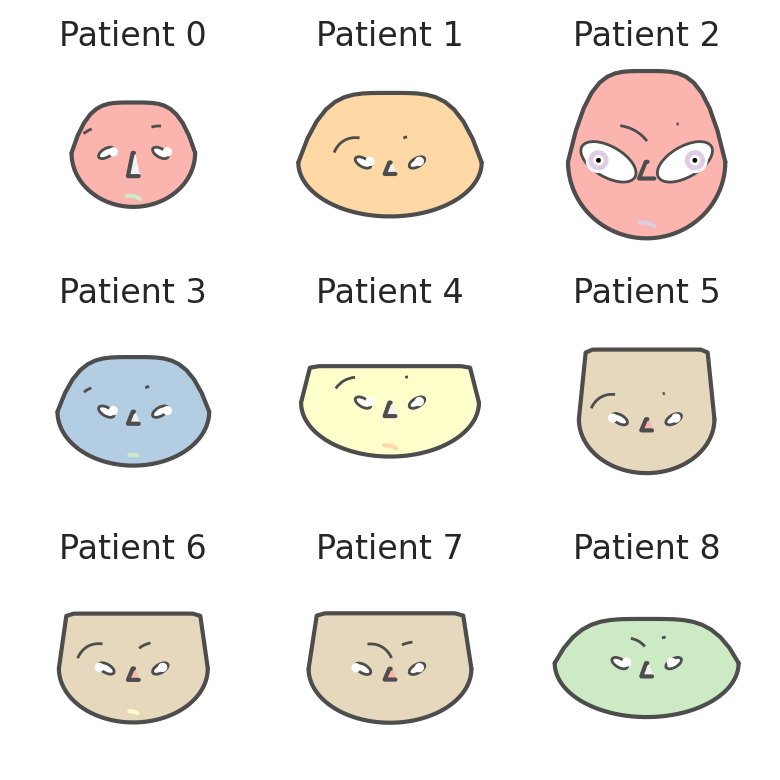

In [25]:

# Make Chernoff faces
fig = chernoff_face(data=data,
                    titles=["Patient " + str(x) for x in range(len(data))],
                    color_mapper=matplotlib.cm.Pastel1, figsize=(4, 4), dpi=200)

# Display
fig.tight_layout()

plt.show()

### Convert Bool to Int

In [15]:
bool_cols = list(X.select_dtypes(include='bool').columns)
bool_cols

['Edema_N', 'Edema_S', 'Edema_Y']

In [16]:
for col in bool_cols:
    X[col] = X[col].astype(int)

In [17]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_Days,312.0,2006.362179,1123.280843,41.00000,1191.000000,1839.500000,2697.250000,4556.000000
Drug,312.0,0.493590,0.500762,0.00000,0.000000,0.000000,1.000000,1.000000
Age,312.0,50.053267,10.588508,26.29589,42.267808,49.828767,56.753425,78.493151
Sex,312.0,0.115385,0.319999,0.00000,0.000000,0.000000,0.000000,1.000000
Ascites,312.0,0.076923,0.266897,0.00000,0.000000,0.000000,0.000000,1.000000
Hepatomegaly,312.0,0.512821,0.500639,0.00000,0.000000,1.000000,1.000000,1.000000
Spiders,312.0,0.288462,0.453775,0.00000,0.000000,0.000000,1.000000,1.000000
Bilirubin,312.0,3.256090,4.530315,0.30000,0.800000,1.350000,3.425000,28.000000
Cholesterol,312.0,369.510563,221.257085,120.00000,255.750000,322.000000,392.250000,1775.000000
Albumin,312.0,3.520000,0.419892,1.96000,3.310000,3.550000,3.800000,4.640000


In [18]:
latex_content = X.describe().transpose().to_latex(float_format="%.2f", multicolumn_format="c")

In [19]:
print(latex_content)

\begin{tabular}{lrrrrrrrr}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
N_Days & 312.00 & 2006.36 & 1123.28 & 41.00 & 1191.00 & 1839.50 & 2697.25 & 4556.00 \\
Drug & 312.00 & 0.49 & 0.50 & 0.00 & 0.00 & 0.00 & 1.00 & 1.00 \\
Age & 312.00 & 50.05 & 10.59 & 26.30 & 42.27 & 49.83 & 56.75 & 78.49 \\
Sex & 312.00 & 0.12 & 0.32 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Ascites & 312.00 & 0.08 & 0.27 & 0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
Hepatomegaly & 312.00 & 0.51 & 0.50 & 0.00 & 0.00 & 1.00 & 1.00 & 1.00 \\
Spiders & 312.00 & 0.29 & 0.45 & 0.00 & 0.00 & 0.00 & 1.00 & 1.00 \\
Bilirubin & 312.00 & 3.26 & 4.53 & 0.30 & 0.80 & 1.35 & 3.42 & 28.00 \\
Cholesterol & 312.00 & 369.51 & 221.26 & 120.00 & 255.75 & 322.00 & 392.25 & 1775.00 \\
Albumin & 312.00 & 3.52 & 0.42 & 1.96 & 3.31 & 3.55 & 3.80 & 4.64 \\
Copper & 312.00 & 97.65 & 85.34 & 4.00 & 41.75 & 73.00 & 123.00 & 588.00 \\
Alk_Phos & 312.00 & 1982.66 & 2140.39 & 289.00 & 871.50 & 1259.00 & 1980.00 & 13862.40 \\
SGO

# Dump ds

In [20]:
from database import dump_ds

In [21]:
dump_ds("clustering", X, None, None, None)


Saved in  /home/alvaro/Desktop/MachineLearning/PracticalApplications/data/clustering.pkl
